In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from scipy.interpolate import make_interp_spline, CubicSpline, make_smoothing_spline
from scipy.signal import savgol_filter
from scipy.stats import beta, uniform

In [3]:
df = pd.read_csv("../output/fig_s1_geom_smooth_plot_2_data.csv", index_col=0)
df2 = pd.read_csv("../output/sfig_1_lfcs.csv", index_col=0)
df3 = pd.read_csv("../output/fig_s1_geom_smooth_plot_2_fpr_data.csv", index_col=0)
df4 = pd.read_csv("../output/fig_s1_geom_smooth_plot_2_power_data.csv", index_col=0)

In [4]:
d = {1: "ALDEx2", 2: "ALDEx2-CTT", 3: "ALDEx2-GTT", 4: "ALDEx2-SM left-skew", 5: "ALDEx2-SM right-skew",
     6: "ALDEx2-SM Unif"}

#df = df[df['group'].isin([1,2,3,4,5,6])]
df["group"] = df["group"].map(d)
#df3 = df3[df3['group'].isin([1,2,3,4,5,6])]
df3["group"] = df3["group"].map(d)
#df4 = df4[df4['group'].isin([1,2,3,4,5,6])]
df4["group"] = df4["group"].map(d)

Text(-0.05, 1.35, '\\textbf{D}')

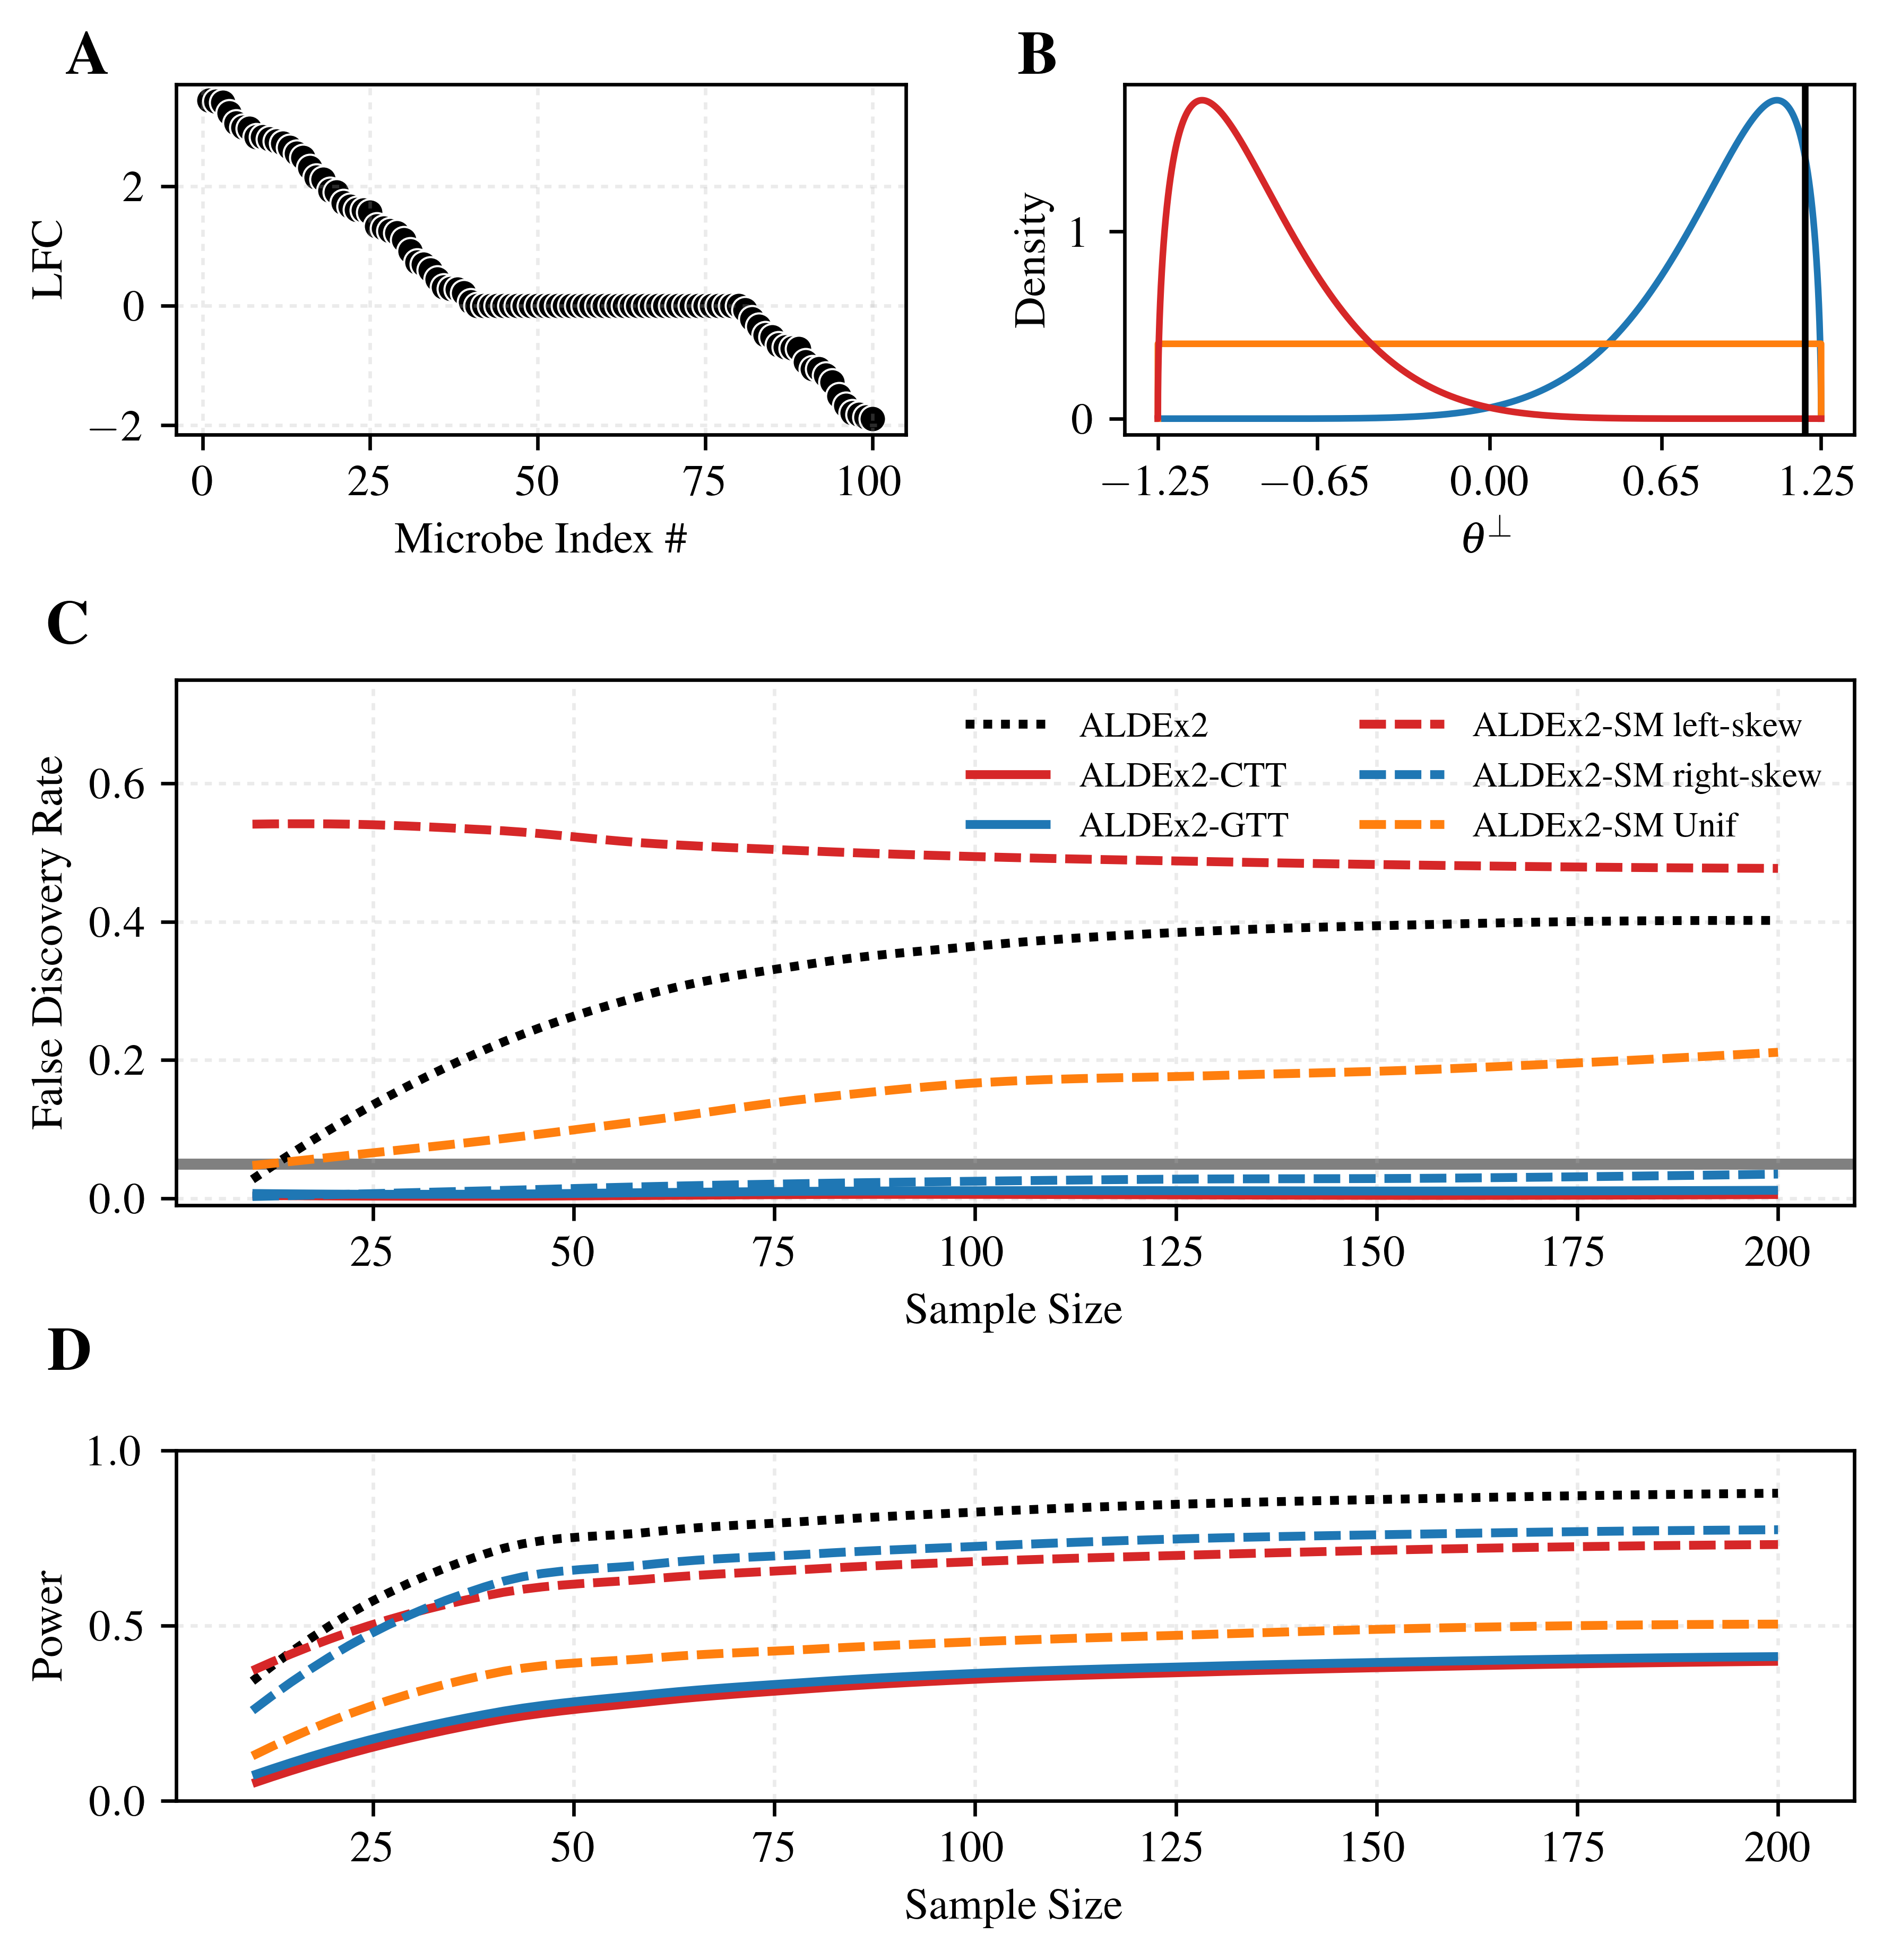

In [5]:
plt.rcParams["font.family"] = "Times"
plt.rcParams["text.usetex"] = True

gs_kw = dict(width_ratios=[1, 1], height_ratios=[1, 1.5, 1])
width = 6.8
height = 7
dpi = 600
pw = width*dpi
ph = height*dpi
fig, axs = plt.subplot_mosaic([["a", "b"],
                               ["c", "c"],
                               ["d", "d"]],
                              figsize=(pw/dpi, ph/dpi),
                              dpi=dpi, gridspec_kw=gs_kw)
plt.subplots_adjust(wspace=0.3, hspace=0.6) 

axs["a"].set_xlabel("Microbe Index \\#")
axs["a"].set_ylabel("LFC")
sns.scatterplot(data=df2, x=df2.index.tolist(), y="lfcs", ax=axs["a"], color="black")
axs["a"].grid(dashes=(2,2), alpha=0.25)

x = np.arange(-0.0001, 2.5002, 0.0001)
y = beta.pdf(x, 8, 1.5, scale=2.5)
sns.lineplot(data=pd.DataFrame({"x":x-1.25, "y":y}), x="x", y="y", ax=axs["b"], color="#1F77B4")
y = uniform.pdf(x, scale=2.5)
sns.lineplot(data=pd.DataFrame({"x":x-1.25, "y":y}), x="x", y="y", ax=axs["b"], color="#FF7F0E")
y = beta.pdf(x, 1.5, 8, scale=2.5)
sns.lineplot(data=pd.DataFrame({"x":x-1.25, "y":y}), x="x", y="y", ax=axs["b"], color="#D62728")
axs["b"].axvline(x=1.19, color="black", linewidth=1.5)
axs["b"].set_xlabel(r"$\theta^\perp$", fontsize=10)
axs["b"].set_ylabel("Density", fontsize=10)
axs["b"].set_xticks([-1.25, -0.65, 0, 0.65, 1.25])

axs["c"].set_ylim(-0.01, 0.75)
palette = ['#000000', '#D62728', '#1F77B4', '#D62728', '#1F77B4', '#FF7F0E']
sns.lineplot(data=df3, x="x", y="y", hue="group", style="group", palette=palette, ax=axs["c"], linewidth=2,
             dashes=[(1,1), (1,0), (1,0), (3,1), (3,1), (3,1)])
axs["c"].set_xlabel("Sample Size", fontsize=10)
axs["c"].set_ylabel("False Discovery Rate", fontsize=10)
axs["c"].grid(dashes=(2,2), alpha=0.25)
axs["c"].axhline(y=0.05, linestyle="solid", linewidth=2.5, color="gray", zorder=-5)
handles, labels = axs["c"].get_legend_handles_labels()
axs["c"].legend(handles=handles[0:], labels=labels[0:], ncol=4)
axs["c"].legend(frameon=False, handlelength=2.4, ncol=2, fontsize=8)

axs["d"].set_ylim(0, 1)
palette = ['#000000', '#D62728', '#1F77B4', '#D62728', '#1F77B4', '#FF7F0E']
sns.lineplot(data=df4, x="x", y="y", hue="group", style="group", palette=palette, ax=axs["d"], linewidth=2,
             dashes=[(1,1), (1,0), (1,0), (3,1), (3,1), (3,1)])
axs["d"].set_xlabel("Sample Size", fontsize=10)
axs["d"].set_ylabel("Power", fontsize=10)
axs["d"].grid(dashes=(2,2), alpha=0.25)
axs["d"].get_legend().remove()

axs["a"].text(-0.09, 1.15, r"\textbf{A}", transform=axs["a"].transAxes,
                fontsize=14, fontweight='bold', va='top', ha='right')
axs["b"].text(-0.09, 1.15, r"\textbf{B}", transform=axs["b"].transAxes,
                fontsize=14, fontweight='bold', va='top', ha='right')
axs["c"].text(-0.05, 1.15, r"\textbf{C}", transform=axs["c"].transAxes,
                fontsize=14, fontweight='bold', va='top', ha='right')
axs["d"].text(-0.05, 1.35, r"\textbf{D}", transform=axs["d"].transAxes,
                fontsize=14, fontweight='bold', va='top', ha='right')

In [6]:
fig.savefig("../../figures/Figure_S3.png", bbox_inches='tight')

In [ ]:
th